In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
#顯示小數到第二位
pd.set_option('display.float_format', lambda x:'%.2f'% x)

In [3]:
! pip install lifetimes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 584 kB 5.3 MB/s 


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from lifetimes import BetaGeoFitter
from lifetimes.utils import calibration_and_holdout_data
from lifetimes.utils import summary_data_from_transaction_data
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.plotting import plot_history_alive,plot_cumulative_transactions
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
import warnings
from sklearn.metrics import mean_absolute_percentage_error

warnings.filterwarnings('ignore')

## 資料探索 

In [5]:
sales_data = pd.read_csv('/content/drive/MyDrive/2022數據合作競賽/資料集/carrefour_sales.csv')

In [6]:
sales_data.columns=["id","order_date","product","sales_price","quantity","department","store","city","district","customer","sex","age_group"]

In [7]:
sales_data

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group
0,10eed4a6-5b6b-40d9-84fe-e7152666d2d5,2021-07-09 17:32:43,99d32476-f1eb-4af8-a7d9-28ebd8e1ce12,85,3,7ed47ad3-61a2-423c-937b-c23bf4ad05f3,38177bc5-93b3-4b7a-ad27-d6aa162ccc9a,0ced232a-ba28-4238-8411-264c228aa751,de4598ec-8318-4e21-8e0a-510a49853a07,53867ee1-e97b-44c3-810b-cc0de8f49217,NaN,1.00
1,b7cf4711-f248-4a12-8bb6-d7a330faac5e,2021-07-06 23:46:09,c54bcaef-b3b9-4601-a5da-8519d33d3b81,89,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,3f6de5e8-3b20-4237-89dc-ee4eff7625a3,08955352-31a8-44ac-8a5e-e13de23db4a2,df5f2a7b-ec52-4505-bd85-26a84438dee0,52eb5d34-a34b-4f29-9d83-e23d48d1e03b,NaN,1.00
2,0b16dd32-838f-4948-bd95-916d7b1a0a42,2021-02-01 15:06:29,abad439e-5bc0-4097-82e8-e87f0cb057ff,64,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,68e916ca-f999-4e5a-9c34-f277f9bc2867,8c4f97b5-e3c1-4279-9829-ee56f920c12b,2b9626af-4919-45e4-873b-4a07a9749421,dbf9be47-c8e9-4fee-b92d-727f68afab96,NaN,1.00
3,a4998917-ae04-45e4-a5fe-4dc4a1fa4b35,2021-01-12 20:40:10,fc007164-7f6e-4833-9e36-e141c3fb4fe6,75,1,22f2e7c7-6679-41fd-9c1d-6e9562b51bce,025c6e08-592c-4f3d-8a9e-6d6b685fef33,4b52005f-878a-4b2b-95ee-d9e2d719046a,9c10f54e-63e5-4b8f-b720-4d95639db9bf,8e5145fd-9b3e-448d-b22e-a81991161656,NaN,8.00
4,a30dca13-d325-4a0c-a8fa-fb2ba762ad93,2021-07-05 00:03:59,f1fc2f7e-2aaa-484d-be31-8369b609cab0,75,2,451ffc74-a780-4ae0-adba-ff8caa8f4b91,025c6e08-592c-4f3d-8a9e-6d6b685fef33,4b52005f-878a-4b2b-95ee-d9e2d719046a,9c10f54e-63e5-4b8f-b720-4d95639db9bf,ba32d21e-9e8c-430b-b8f6-c11e0c34ffb7,NaN,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...
17362457,5867bdad-9694-4467-a0bc-16e033229001,2020-05-09 03:33:54,4fca0aee-1e50-4269-825a-593d048c1505,149,1,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,74ba5ee0-dbab-4076-8d5c-817457907b10,NaN,4.00
17362458,64207f8c-72be-46ee-ac80-8d3df7ded23f,2020-06-05 19:07:14,f95661c9-5e74-4175-83f8-c17c32f79295,0,1,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,b8de3c4d-b56f-42b7-88fd-c8b6c50f80f3,B,4.00
17362459,c2ff56cc-09d0-4fb3-86a9-1c1d389238b3,2020-06-01 10:29:28,727fa7bc-7ff7-4fea-a988-c4f7fce68655,119,2,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,0b2331d4-1d32-4e1b-b18f-4587f879eebf,A,4.00
17362460,62ae6ac2-8cbf-40ff-a1c5-dba9fcbd430b,2021-03-02 00:03:21,39cc3ff3-74b2-45a0-a3e0-2e01d3f96c68,39,2,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,0319a423-6e73-4be0-b9b3-e69df7f57cbc,NaN,2.00


In [8]:
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])

In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17362462 entries, 0 to 17362461
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           object        
 1   order_date   datetime64[ns]
 2   product      object        
 3   sales_price  int64         
 4   quantity     int64         
 5   department   object        
 6   store        object        
 7   city         object        
 8   district     object        
 9   customer     object        
 10  sex          object        
 11  age_group    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 1.6+ GB


In [10]:
sales_data.shape

(17362462, 12)

查看是否有null值

In [11]:
sales_data.isna().any()

id             False
order_date     False
product        False
sales_price    False
quantity       False
department     False
store          False
city           False
district       False
customer       False
sex             True
age_group       True
dtype: bool

In [12]:
sales_data['Revenue'] = sales_data['quantity'] * sales_data['sales_price']
sales_data

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,Revenue
0,10eed4a6-5b6b-40d9-84fe-e7152666d2d5,2021-07-09 17:32:43,99d32476-f1eb-4af8-a7d9-28ebd8e1ce12,85,3,7ed47ad3-61a2-423c-937b-c23bf4ad05f3,38177bc5-93b3-4b7a-ad27-d6aa162ccc9a,0ced232a-ba28-4238-8411-264c228aa751,de4598ec-8318-4e21-8e0a-510a49853a07,53867ee1-e97b-44c3-810b-cc0de8f49217,NaN,1.00,255
1,b7cf4711-f248-4a12-8bb6-d7a330faac5e,2021-07-06 23:46:09,c54bcaef-b3b9-4601-a5da-8519d33d3b81,89,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,3f6de5e8-3b20-4237-89dc-ee4eff7625a3,08955352-31a8-44ac-8a5e-e13de23db4a2,df5f2a7b-ec52-4505-bd85-26a84438dee0,52eb5d34-a34b-4f29-9d83-e23d48d1e03b,NaN,1.00,89
2,0b16dd32-838f-4948-bd95-916d7b1a0a42,2021-02-01 15:06:29,abad439e-5bc0-4097-82e8-e87f0cb057ff,64,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,68e916ca-f999-4e5a-9c34-f277f9bc2867,8c4f97b5-e3c1-4279-9829-ee56f920c12b,2b9626af-4919-45e4-873b-4a07a9749421,dbf9be47-c8e9-4fee-b92d-727f68afab96,NaN,1.00,64
3,a4998917-ae04-45e4-a5fe-4dc4a1fa4b35,2021-01-12 20:40:10,fc007164-7f6e-4833-9e36-e141c3fb4fe6,75,1,22f2e7c7-6679-41fd-9c1d-6e9562b51bce,025c6e08-592c-4f3d-8a9e-6d6b685fef33,4b52005f-878a-4b2b-95ee-d9e2d719046a,9c10f54e-63e5-4b8f-b720-4d95639db9bf,8e5145fd-9b3e-448d-b22e-a81991161656,NaN,8.00,75
4,a30dca13-d325-4a0c-a8fa-fb2ba762ad93,2021-07-05 00:03:59,f1fc2f7e-2aaa-484d-be31-8369b609cab0,75,2,451ffc74-a780-4ae0-adba-ff8caa8f4b91,025c6e08-592c-4f3d-8a9e-6d6b685fef33,4b52005f-878a-4b2b-95ee-d9e2d719046a,9c10f54e-63e5-4b8f-b720-4d95639db9bf,ba32d21e-9e8c-430b-b8f6-c11e0c34ffb7,NaN,8.00,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17362457,5867bdad-9694-4467-a0bc-16e033229001,2020-05-09 03:33:54,4fca0aee-1e50-4269-825a-593d048c1505,149,1,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,74ba5ee0-dbab-4076-8d5c-817457907b10,NaN,4.00,149
17362458,64207f8c-72be-46ee-ac80-8d3df7ded23f,2020-06-05 19:07:14,f95661c9-5e74-4175-83f8-c17c32f79295,0,1,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,b8de3c4d-b56f-42b7-88fd-c8b6c50f80f3,B,4.00,0
17362459,c2ff56cc-09d0-4fb3-86a9-1c1d389238b3,2020-06-01 10:29:28,727fa7bc-7ff7-4fea-a988-c4f7fce68655,119,2,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,0b2331d4-1d32-4e1b-b18f-4587f879eebf,A,4.00,238
17362460,62ae6ac2-8cbf-40ff-a1c5-dba9fcbd430b,2021-03-02 00:03:21,39cc3ff3-74b2-45a0-a3e0-2e01d3f96c68,39,2,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,0319a423-6e73-4be0-b9b3-e69df7f57cbc,NaN,2.00,78


In [13]:
sales_data.drop(sales_data[(sales_data['Revenue']<0)].index, inplace=True)

In [14]:
sales_data.Revenue.describe()

count   17362415.00
mean         172.98
std          595.53
min            0.00
25%           63.00
50%           99.00
75%          176.00
max       450000.00
Name: Revenue, dtype: float64

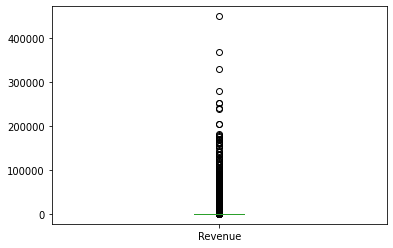

In [15]:
#查看資料分布
sales_data['Revenue'].plot.box()

In [16]:
sales_data_cp = sales_data.copy()

## IQR去除Outliers 

In [17]:
sales_data_cp

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,Revenue
0,10eed4a6-5b6b-40d9-84fe-e7152666d2d5,2021-07-09 17:32:43,99d32476-f1eb-4af8-a7d9-28ebd8e1ce12,85,3,7ed47ad3-61a2-423c-937b-c23bf4ad05f3,38177bc5-93b3-4b7a-ad27-d6aa162ccc9a,0ced232a-ba28-4238-8411-264c228aa751,de4598ec-8318-4e21-8e0a-510a49853a07,53867ee1-e97b-44c3-810b-cc0de8f49217,NaN,1.00,255
1,b7cf4711-f248-4a12-8bb6-d7a330faac5e,2021-07-06 23:46:09,c54bcaef-b3b9-4601-a5da-8519d33d3b81,89,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,3f6de5e8-3b20-4237-89dc-ee4eff7625a3,08955352-31a8-44ac-8a5e-e13de23db4a2,df5f2a7b-ec52-4505-bd85-26a84438dee0,52eb5d34-a34b-4f29-9d83-e23d48d1e03b,NaN,1.00,89
2,0b16dd32-838f-4948-bd95-916d7b1a0a42,2021-02-01 15:06:29,abad439e-5bc0-4097-82e8-e87f0cb057ff,64,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,68e916ca-f999-4e5a-9c34-f277f9bc2867,8c4f97b5-e3c1-4279-9829-ee56f920c12b,2b9626af-4919-45e4-873b-4a07a9749421,dbf9be47-c8e9-4fee-b92d-727f68afab96,NaN,1.00,64
3,a4998917-ae04-45e4-a5fe-4dc4a1fa4b35,2021-01-12 20:40:10,fc007164-7f6e-4833-9e36-e141c3fb4fe6,75,1,22f2e7c7-6679-41fd-9c1d-6e9562b51bce,025c6e08-592c-4f3d-8a9e-6d6b685fef33,4b52005f-878a-4b2b-95ee-d9e2d719046a,9c10f54e-63e5-4b8f-b720-4d95639db9bf,8e5145fd-9b3e-448d-b22e-a81991161656,NaN,8.00,75
4,a30dca13-d325-4a0c-a8fa-fb2ba762ad93,2021-07-05 00:03:59,f1fc2f7e-2aaa-484d-be31-8369b609cab0,75,2,451ffc74-a780-4ae0-adba-ff8caa8f4b91,025c6e08-592c-4f3d-8a9e-6d6b685fef33,4b52005f-878a-4b2b-95ee-d9e2d719046a,9c10f54e-63e5-4b8f-b720-4d95639db9bf,ba32d21e-9e8c-430b-b8f6-c11e0c34ffb7,NaN,8.00,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17362457,5867bdad-9694-4467-a0bc-16e033229001,2020-05-09 03:33:54,4fca0aee-1e50-4269-825a-593d048c1505,149,1,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,74ba5ee0-dbab-4076-8d5c-817457907b10,NaN,4.00,149
17362458,64207f8c-72be-46ee-ac80-8d3df7ded23f,2020-06-05 19:07:14,f95661c9-5e74-4175-83f8-c17c32f79295,0,1,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,b8de3c4d-b56f-42b7-88fd-c8b6c50f80f3,B,4.00,0
17362459,c2ff56cc-09d0-4fb3-86a9-1c1d389238b3,2020-06-01 10:29:28,727fa7bc-7ff7-4fea-a988-c4f7fce68655,119,2,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,0b2331d4-1d32-4e1b-b18f-4587f879eebf,A,4.00,238
17362460,62ae6ac2-8cbf-40ff-a1c5-dba9fcbd430b,2021-03-02 00:03:21,39cc3ff3-74b2-45a0-a3e0-2e01d3f96c68,39,2,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,0319a423-6e73-4be0-b9b3-e69df7f57cbc,NaN,2.00,78


In [18]:
def Outlier_treatment(datacolumn):
    Q1,Q3 = np.percentile(datacolumn,[25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    high_range = Q3+(1.5 * IQR)
    return lower_range, high_range

In [19]:
lowerbound, highbound = Outlier_treatment(sales_data_cp['Revenue'])
sales_data_cp[(sales_data_cp['Revenue']<lowerbound) | (sales_data_cp['Revenue']>highbound)]

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,Revenue
18,ed16c620-3daf-4f5b-a33c-c2de9fdfe2ae,2021-11-06 10:48:21,f88e1aba-2329-45db-84cc-c397a4740ed3,155,4,e34c118c-7249-4630-a027-7cd775e2d8ac,94df2f9b-ded1-41ee-8e95-6473b34ee9e3,827e9e3a-30c8-40d0-8241-56773e6d8d9b,5b5b7413-1eca-4027-ad56-4ac009375674,991bcb5e-ada1-4fa8-b7d4-306ac24ca6f7,NaN,8.00,620
41,890dbd0d-d329-49d5-a5b1-78345200593d,2021-08-13 17:29:26,0e6a151f-1861-4fcd-b093-25080dfac7a1,369,1,a6d41062-6792-4b0b-9e2a-a8c25ffffc18,94df2f9b-ded1-41ee-8e95-6473b34ee9e3,827e9e3a-30c8-40d0-8241-56773e6d8d9b,5b5b7413-1eca-4027-ad56-4ac009375674,d29fd2ae-8fe6-49b1-b73a-d889089307de,NaN,1.00,369
119,f3470146-9d6f-4dca-ae51-1a7ddd287877,2021-06-10 10:04:55,69373ee2-fd65-40eb-9657-a6b9aa13419a,258,2,5c829257-734d-4ac0-9c4f-776b954331f0,1d70239b-2f43-4af0-b663-933777cd253a,e72a9aa3-1621-4b7b-8d5f-2f4365c83241,6ae2071c-5a2b-43cd-ab82-650c383b3767,a7280ea7-54c1-4d50-a984-50aa74fa50cd,NaN,1.00,516
149,161de37d-edc7-42ed-8bd9-ba7de75d03ee,2021-05-30 11:16:49,471b08a4-3e46-42b4-9d2b-868b4ea8a96a,198,3,f57143f5-672f-4c78-89f1-242f7a2d8a65,cece3286-dae9-4bda-96a8-a1c5c267acd9,db83dcc1-85c9-44f9-a047-426b02e8e1a3,339fb39c-3a2b-45da-b036-8e2d7761c4b3,129481ae-8673-49ac-968a-653f0cbb28d1,NaN,1.00,594
156,22263187-49fe-477a-8873-a34ee0b09a25,2021-01-29 14:49:47,84b075ab-ed6a-4aa1-aeaa-932c9a441b31,149,3,a6d41062-6792-4b0b-9e2a-a8c25ffffc18,5af895f1-c7ae-477c-ab50-6cba9ef000aa,db83dcc1-85c9-44f9-a047-426b02e8e1a3,bfc3b05d-a7e9-4695-81cc-fd7eddebf050,abf835d8-dab3-464e-a493-8448ea999154,NaN,1.00,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17362400,6154119a-b046-4fc4-9acf-0a17a2c8ffa0,2021-08-16 17:13:19,e8877e52-6b1c-4ece-ae26-0d6111bce330,712,1,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,61cce838-87e0-46af-9e05-b362628967c0,NaN,4.00,712
17362419,abcf0b60-c5d5-464b-9b86-0193b7839e5f,2021-10-06 15:30:54,06982d27-e639-4555-bd20-cccebb2da190,129,3,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,4cded48c-ca57-4899-b804-b82c8770b09b,B,6.00,387
17362426,4cc5aa2f-f53a-4a44-9a7e-19c898f33885,2020-07-01 16:02:02,a3d24866-76a8-4a9f-8345-c3b09f7ae466,349,2,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,2e8f8765-d500-4f30-b0b1-02cfeb576c20,NaN,4.00,698
17362438,460139f4-66ce-406a-936b-fbef93f1ba77,2021-06-03 13:48:51,fea7ed41-34d0-476b-b956-ec5a1303f99a,176,2,fc537967-e742-4916-b487-8dedc17a11f5,fba05cc9-e1df-45b8-ba26-8f572aa41254,47dcfd11-1d5f-4fb6-b7e1-0e42c90a4ae3,12ef2c2c-a649-4f02-8796-5444ab19897c,f7eca2ec-0887-482a-854e-959afefb13cb,NaN,6.00,352


In [20]:
sales_data_cp.drop(sales_data_cp[(sales_data_cp['Revenue']<lowerbound) | (sales_data_cp['Revenue']>highbound)].index, inplace=True)

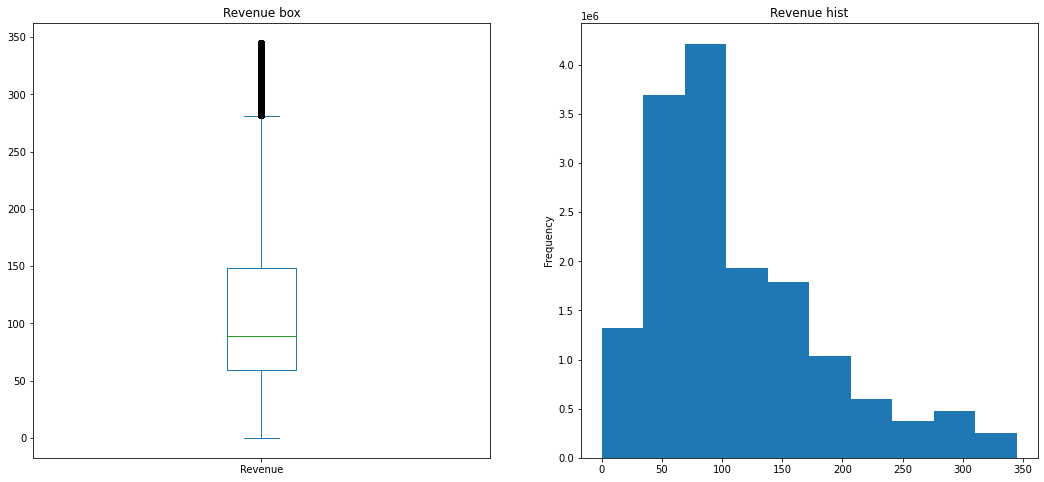

In [21]:
figure, axis = plt.subplots(1, 2,figsize=(18,8))
sales_data_cp['Revenue'].plot.box(ax=axis[0])
axis[0].set_title('Revenue box')
sales_data_cp['Revenue'].plot.hist(ax=axis[1])
axis[1].set_title('Revenue hist')
plt.show()

In [22]:
sales_data_cp.shape

(15689656, 13)

In [23]:
sales_data_cp['order_date'].min()

Timestamp('2020-04-29 00:00:39')

In [24]:
#16/4
sales_data_cp['order_date'].max()

Timestamp('2021-12-31 23:45:21')

## Calculate the raw recency, frequency, and monetary metrics

In [25]:
df_rfmt = summary_data_from_transaction_data(sales_data_cp, 
                      'customer', 
                      'order_date', 
                      'Revenue',
                      observation_period_end='2021-12-31')

df_rfmt.head()

,frequency,recency,T,monetary_value
customer,,,,
00001f06-ae9a-4063-a22d-fd7754c89d74,2.00,99.00,246.00,834.00
00002857-64cb-4112-afb9-aa8e6eb79eb4,6.00,205.00,265.00,332.17
0000cc39-a123-425f-b133-ae254f905176,5.00,349.00,596.00,481.20
0001ae29-bf87-411e-afed-3545f835ac52,25.00,387.00,418.00,1269.64
0001cd9d-eae6-41df-ae53-063592b30c67,0.00,0.00,434.00,0.00


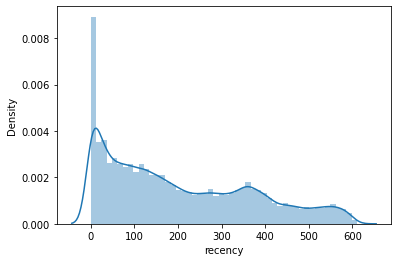

In [26]:
ax = sns.distplot(df_rfmt['recency'])

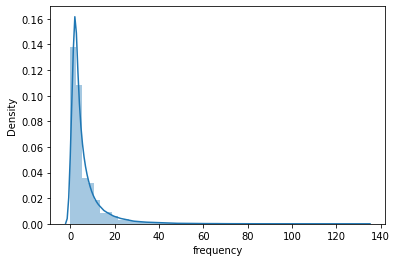

In [27]:
ax = sns.distplot(df_rfmt['frequency'])

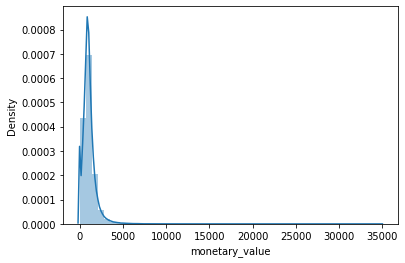

In [28]:
ax = sns.distplot(df_rfmt['monetary_value'])

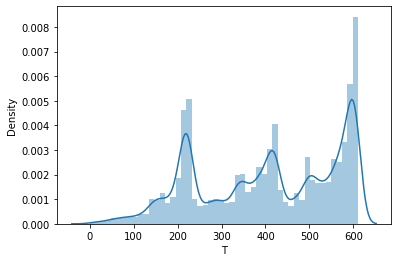

In [29]:
ax = sns.distplot(df_rfmt['T'])

## **Fit the BG/NBD model**

In [30]:
bgf = BetaGeoFitter(penalizer_coef=0)
bgf.fit(df_rfmt['frequency'], df_rfmt['recency'], df_rfmt['T'])
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,1.27,0.01,1.26,1.28
alpha,39.21,0.20,38.81,39.60
a,1.47,0.02,1.44,1.50
b,9.36,0.13,9.10,9.63


## Plot the recency and frequency of customers

In [31]:
#axis length
max_freq = int(df_rfmt["frequency"].max())  #quantile(0.95))          
max_T = int(df_rfmt["T"].max())                         
max_rec = int(df_rfmt["recency"].max())  
print(max_freq)

133


In [32]:
# helper function: plot expected number of future purchases a customer with 
#    frequency f and recency r will make in forecast period

def plot_freq_rec(t):
    fig = plt.figure(figsize=(7, 7)) 
    plot_frequency_recency_matrix(
            model = bgf,   
            T = t,  
            max_frequency = max_freq,  
            max_recency = max_rec);

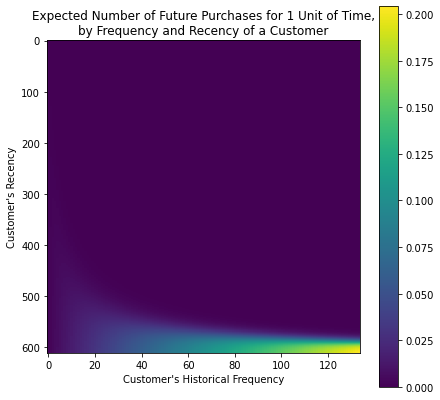

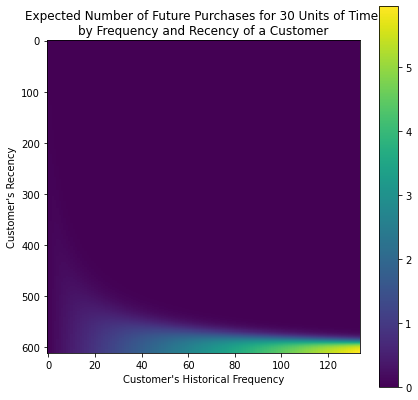

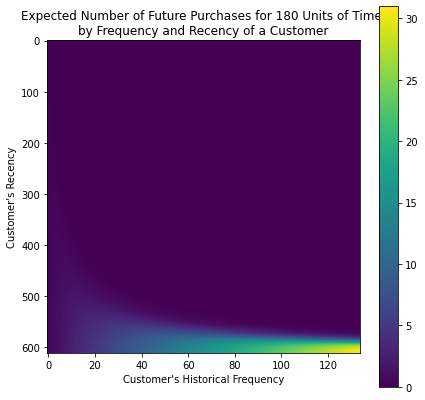

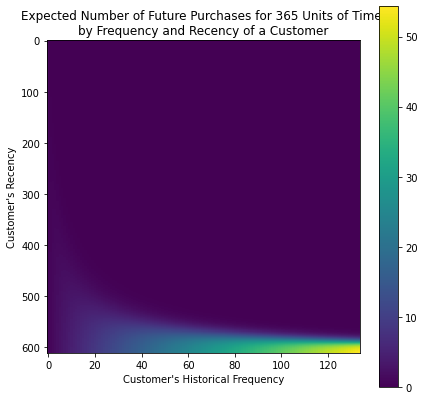

In [33]:
# call plotter function for different forecast periods:
tFC = [1, 30, 180, 365]
_ = [plot_freq_rec(t) for t in tFC]

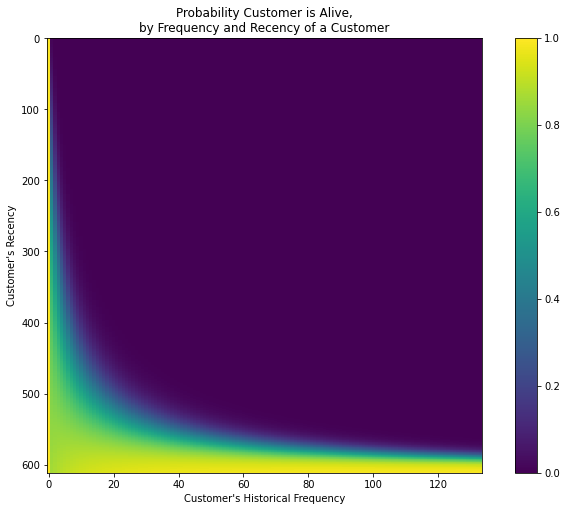

In [34]:
fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

## Predict the number of orders each customer will make during a time period

In [35]:
t = 1
df_rfmt['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t,   
                                              df_rfmt['frequency'], 
                                              df_rfmt['recency'], 
                                              df_rfmt['T'])
df_rfmt.sort_values(by='predicted_purchases').tail(5)

,frequency,recency,T,monetary_value,predicted_purchases
customer,,,,,
03576d87-1b6e-4ce7-b669-598490d83944,25.00,58.00,61.00,2606.60,0.24
28029ea2-1c52-4cfa-89a6-076e4852c72c,112.00,399.00,405.00,2373.80,0.24
2cc1572d-4d63-4982-968f-872a960e149b,117.00,427.00,429.00,2766.64,0.25
eb6c7b95-0874-40fe-92f3-59429f7043ce,25.00,49.00,51.00,3203.36,0.27
704229b8-f17b-4fc9-81d4-b96a55364da2,44.00,96.00,98.00,5656.77,0.31


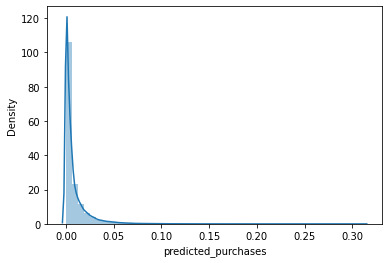

In [36]:
ax = sns.distplot(df_rfmt['predicted_purchases'])

In [37]:
# predict each customer's purchases over next t days
def predict_purch(df, t):
        df["predict_purch_" + str(t)] = \
                bgf.conditional_expected_number_of_purchases_up_to_time(t,   
                                              df_rfmt['frequency'], 
                                              df_rfmt['recency'], 
                                              df_rfmt['T'])

In [38]:
# call helper function: predict each customer's purchases over multiple time periods
t_FC = [1, 30, 180, 365]
_ = [predict_purch(df_rfmt, t) for t in t_FC]
pd.options.display.float_format = '{:,.1f}'.format
print("predicted number of purchases for each customer over next t days:")
df_rfmt

predicted number of purchases for each customer over next t days:


,frequency,recency,T,monetary_value,predicted_purchases,predict_purch_1,predict_purch_30,predict_purch_180,predict_purch_365
customer,,,,,,,,,
00001f06-ae9a-4063-a22d-fd7754c89d74,2.0,99.0,246.0,834.0,0.0,0.0,0.1,0.7,1.3
00002857-64cb-4112-afb9-aa8e6eb79eb4,6.0,205.0,265.0,332.2,0.0,0.0,0.5,2.4,4.1
0000cc39-a123-425f-b133-ae254f905176,5.0,349.0,596.0,481.2,0.0,0.0,0.1,0.5,0.9
0001ae29-bf87-411e-afed-3545f835ac52,25.0,387.0,418.0,"1,269.6",0.0,0.0,1.3,6.7,11.5
0001cd9d-eae6-41df-ae53-063592b30c67,0.0,0.0,434.0,0.0,0.0,0.0,0.1,0.5,0.9
...,...,...,...,...,...,...,...,...,...
ffff742d-a685-4161-bc54-4b4dac33ec39,11.0,360.0,407.0,"1,725.0",0.0,0.0,0.6,3.2,5.7
ffff7ef9-9a24-4368-8ac5-354aacd765f3,1.0,53.0,493.0,"2,248.0",0.0,0.0,0.0,0.1,0.1
ffffecab-6e82-4ada-a55e-a104f2f899f6,4.0,68.0,521.0,712.5,0.0,0.0,0.0,0.0,0.0


In [39]:
# top 10 customers over next 30 days
print("top 10 customers, by their predicted purchases over next 30 days")
df_rfmt.sort_values(by="predict_purch_30", ascending=False).head(10)

top 10 customers, by their predicted purchases over next 30 days


,frequency,recency,T,monetary_value,predicted_purchases,predict_purch_1,predict_purch_30,predict_purch_180,predict_purch_365
customer,,,,,,,,,
704229b8-f17b-4fc9-81d4-b96a55364da2,44.0,96.0,98.0,"5,656.8",0.3,0.3,8.3,32.0,46.1
2cc1572d-4d63-4982-968f-872a960e149b,117.0,427.0,429.0,"2,766.6",0.2,0.2,7.1,35.5,59.9
28029ea2-1c52-4cfa-89a6-076e4852c72c,112.0,399.0,405.0,"2,373.8",0.2,0.2,6.9,34.2,57.4
eb6c7b95-0874-40fe-92f3-59429f7043ce,25.0,49.0,51.0,"3,203.4",0.3,0.3,6.8,24.0,33.0
4766e0aa-70c0-49b2-a7bb-18aa2765a674,63.0,229.0,229.0,"1,270.8",0.2,0.2,6.6,29.8,47.0
8bd811c7-c78e-44c7-a476-57583f474e17,53.0,188.0,191.0,"1,301.1",0.2,0.2,6.2,27.4,42.5
21f582be-3e48-43bd-b116-efe8c536f8a2,133.0,572.0,575.0,892.3,0.2,0.2,6.2,32.2,56.1
03576d87-1b6e-4ce7-b669-598490d83944,25.0,58.0,61.0,"2,606.6",0.2,0.2,6.2,22.3,31.2
5f4a8f7f-c57f-4010-aced-209a39f54a93,83.0,337.0,343.0,863.0,0.2,0.2,5.9,28.7,47.3


In [40]:
# probability that a customer is alive for each customer in dataframe
prob_alive = bgf.conditional_probability_alive(
        frequency = df_rfmt["frequency"], 
        recency = df_rfmt["recency"], 
        T = df_rfmt["T"])

df_rfmt["prob_alive"] = prob_alive
pd.options.display.float_format = '{:,.2f}'.format
df_rfmt.describe()

,frequency,recency,T,monetary_value,predicted_purchases,predict_purch_1,predict_purch_30,predict_purch_180,predict_purch_365,prob_alive
count,"201,213.00","201,213.00","201,213.00","201,213.00","201,213.00","201,213.00","201,213.00","201,213.00","201,213.00","201,213.00"
mean,6.34,203.39,405.88,"1,048.26",0.01,0.01,0.24,1.24,2.18,0.41
std,8.29,167.64,156.77,807.62,0.01,0.01,0.40,2.03,3.49,0.34
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,57.00,249.00,615.00,0.00,0.00,0.02,0.09,0.17,0.05
50%,4.00,161.00,417.00,934.40,0.00,0.00,0.10,0.55,1.02,0.36
75%,7.00,336.00,562.00,"1,302.00",0.01,0.01,0.27,1.45,2.60,0.73
max,133.00,611.00,611.00,"34,820.00",0.31,0.31,8.28,35.50,59.95,1.00


In [41]:
# show customers who are alive, more than 90% certainty
df_rfmt[df_rfmt["prob_alive"] > 0.9]

,frequency,recency,T,monetary_value,predicted_purchases,predict_purch_1,predict_purch_30,predict_purch_180,predict_purch_365,prob_alive
customer,,,,,,,,,,
0001cd9d-eae6-41df-ae53-063592b30c67,0.00,0.00,434.00,0.00,0.00,0.00,0.08,0.46,0.88,1.00
00052f9a-4e0a-48af-aa4c-b4b873fe2e50,0.00,0.00,109.00,0.00,0.01,0.01,0.25,1.32,2.35,1.00
00086c0c-439e-4632-8453-54a1820e4b6d,0.00,0.00,145.00,0.00,0.01,0.01,0.20,1.09,1.98,1.00
000af54b-7c3d-40e2-a551-30826fa2cf19,39.00,592.00,611.00,"1,234.44",0.06,0.06,1.64,8.68,15.42,0.91
000e6b48-061c-402e-8a3f-58921e34e32c,0.00,0.00,414.00,0.00,0.00,0.00,0.08,0.48,0.92,1.00
...,...,...,...,...,...,...,...,...,...,...
ffd793ce-3570-4db3-a9d0-3993ed3ba065,34.00,582.00,598.00,"2,102.56",0.05,0.05,1.49,7.88,14.01,0.92
ffd89c8e-7aa8-4b2b-a5a8-b5248aec76bc,40.00,464.00,470.00,"1,032.38",0.08,0.08,2.24,11.48,19.86,0.95
ffed514e-00a7-4107-8fa5-a43b49435a4a,0.00,0.00,253.00,0.00,0.00,0.00,0.13,0.72,1.35,1.00


In [42]:
df_rfmt.to_csv('/content/drive/MyDrive/2022數據合作競賽/資料集/purchases_monetay_predict.csv')

## Compare the model’s predictions to the actual data

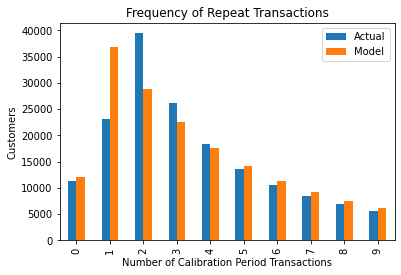

In [43]:
plot_period_transactions(bgf, max_frequency = 10)

## Get predictions for a specific customer

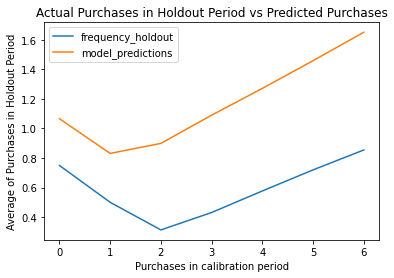

In [44]:
summary_cal_holdout = calibration_and_holdout_data(sales_data_cp, 'customer', 'order_date',calibration_period_end='2021-08-31',observation_period_end='2021-12-31')                                
bgf.fit(summary_cal_holdout['frequency_cal'],   
        summary_cal_holdout['recency_cal'], 
        summary_cal_holdout['T_cal'])
plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)

## Predicting customer lifetime value

In [45]:
df_rfmt[df_rfmt.index=="ba32d21e-9e8c-430b-b8f6-c11e0c34ffb7"]

,frequency,recency,T,monetary_value,predicted_purchases,predict_purch_1,predict_purch_30,predict_purch_180,predict_purch_365,prob_alive
customer,,,,,,,,,,
ba32d21e-9e8c-430b-b8f6-c11e0c34ffb7,9.00,92.00,216.00,678.33,0.00,0.00,0.01,0.07,0.12,0.01


In [49]:
#可將ba32d21e-9e8c-430b-b8f6-c11e0c34ffb7換成想預測的顧客id
example_customer_orders = sales_data_cp.loc[sales_data_cp['customer'] == "ba32d21e-9e8c-430b-b8f6-c11e0c34ffb7"	]
example_customer_orders

,id,order_date,product,sales_price,quantity,department,store,city,district,customer,sex,age_group,Revenue
4,a30dca13-d325-4a0c-a8fa-fb2ba762ad93,2021-07-05 00:03:59,f1fc2f7e-2aaa-484d-be31-8369b609cab0,75,2,451ffc74-a780-4ae0-adba-ff8caa8f4b91,025c6e08-592c-4f3d-8a9e-6d6b685fef33,4b52005f-878a-4b2b-95ee-d9e2d719046a,9c10f54e-63e5-4b8f-b720-4d95639db9bf,ba32d21e-9e8c-430b-b8f6-c11e0c34ffb7,NaN,8.00,150
257,ad7b6a34-40a4-4df6-94a4-d158cadf3e56,2021-07-21 11:22:33,32dc4137-5330-45ec-82ab-02ab77181904,50,2,451ffc74-a780-4ae0-adba-ff8caa8f4b91,025c6e08-592c-4f3d-8a9e-6d6b685fef33,4b52005f-878a-4b2b-95ee-d9e2d719046a,9c10f54e-63e5-4b8f-b720-4d95639db9bf,ba32d21e-9e8c-430b-b8f6-c11e0c34ffb7,NaN,8.00,100
4538,64412ba2-e684-4d6e-89bb-d68f240c4c66,2021-08-29 14:15:08,5611d734-ae5c-4b43-ad3f-f5389528e46b,75,3,451ffc74-a780-4ae0-adba-ff8caa8f4b91,88a89e42-64aa-442d-9544-4fdad63f308f,4b52005f-878a-4b2b-95ee-d9e2d719046a,a01cd4d6-79d0-4532-9e2f-b5be693e0057,ba32d21e-9e8c-430b-b8f6-c11e0c34ffb7,NaN,8.00,225
1021983,ab7f4215-db6f-44f1-bed4-f2d46bee4646,2021-07-06 00:08:51,0c995c04-0217-4887-963b-7a184eae110e,45,2,c556530b-d0a9-4beb-bc19-7044962f9aa8,025c6e08-592c-4f3d-8a9e-6d6b685fef33,4b52005f-878a-4b2b-95ee-d9e2d719046a,9c10f54e-63e5-4b8f-b720-4d95639db9bf,ba32d21e-9e8c-430b-b8f6-c11e0c34ffb7,NaN,8.00,90
1026106,64412ba2-e684-4d6e-89bb-d68f240c4c66,2021-08-29 14:15:08,66d0f04c-ad83-401e-af2f-dbd4a54de1b3,55,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,88a89e42-64aa-442d-9544-4fdad63f308f,4b52005f-878a-4b2b-95ee-d9e2d719046a,a01cd4d6-79d0-4532-9e2f-b5be693e0057,ba32d21e-9e8c-430b-b8f6-c11e0c34ffb7,NaN,8.00,55
1026728,10bc6969-1ec1-400c-a7d0-25c212e4f247,2021-05-29 21:56:22,15794dcb-a44b-46df-a937-588c73e6eee2,97,2,451ffc74-a780-4ae0-adba-ff8caa8f4b91,88a89e42-64aa-442d-9544-4fdad63f308f,4b52005f-878a-4b2b-95ee-d9e2d719046a,a01cd4d6-79d0-4532-9e2f-b5be693e0057,ba32d21e-9e8c-430b-b8f6-c11e0c34ffb7,NaN,8.00,194
2045767,a30dca13-d325-4a0c-a8fa-fb2ba762ad93,2021-07-05 00:03:59,5611d734-ae5c-4b43-ad3f-f5389528e46b,75,3,451ffc74-a780-4ae0-adba-ff8caa8f4b91,025c6e08-592c-4f3d-8a9e-6d6b685fef33,4b52005f-878a-4b2b-95ee-d9e2d719046a,9c10f54e-63e5-4b8f-b720-4d95639db9bf,ba32d21e-9e8c-430b-b8f6-c11e0c34ffb7,NaN,8.00,225
2050099,cc4c0fe8-e1d1-4c35-a034-1950b5733b7d,2021-06-05 17:57:41,687c9063-2c11-49a3-a38e-3fb3fa0e91e8,38,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,88a89e42-64aa-442d-9544-4fdad63f308f,4b52005f-878a-4b2b-95ee-d9e2d719046a,a01cd4d6-79d0-4532-9e2f-b5be693e0057,ba32d21e-9e8c-430b-b8f6-c11e0c34ffb7,NaN,8.00,38
3064873,a30dca13-d325-4a0c-a8fa-fb2ba762ad93,2021-07-05 00:03:59,df6b4007-01f8-449b-bef1-5ddb8b38cff7,55,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,025c6e08-592c-4f3d-8a9e-6d6b685fef33,4b52005f-878a-4b2b-95ee-d9e2d719046a,9c10f54e-63e5-4b8f-b720-4d95639db9bf,ba32d21e-9e8c-430b-b8f6-c11e0c34ffb7,NaN,8.00,55
3069262,cc4c0fe8-e1d1-4c35-a034-1950b5733b7d,2021-06-05 17:57:41,b41e9195-2bfb-4358-b13d-31c5bcc49501,64,1,f57143f5-672f-4c78-89f1-242f7a2d8a65,88a89e42-64aa-442d-9544-4fdad63f308f,4b52005f-878a-4b2b-95ee-d9e2d719046a,a01cd4d6-79d0-4532-9e2f-b5be693e0057,ba32d21e-9e8c-430b-b8f6-c11e0c34ffb7,NaN,8.00,64


611


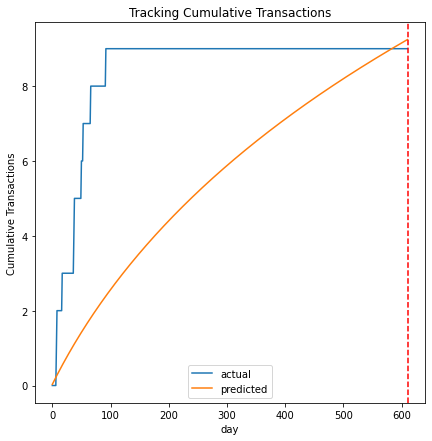

In [48]:
# X selected customer: cumulative transactions
max_date = sales_data_cp["order_date"].max()
min_date = sales_data_cp["order_date"].min()
span_days = (max_date - min_date).days
print(span_days)

fig = plt.figure(figsize=(7, 7)) 
plot_cumulative_transactions(
            model = bgf,  
            transactions = example_customer_orders, 
            datetime_col = "order_date",  
            customer_id_col = "customer",  
            t = span_days,  
            t_cal = span_days);

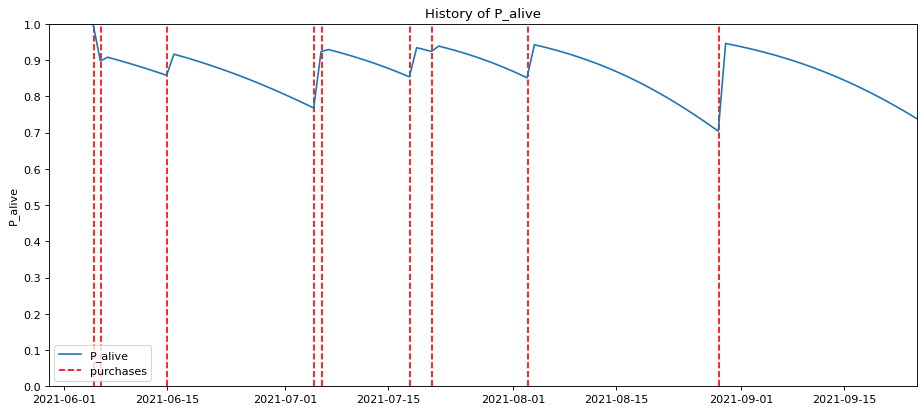

In [50]:
fig = plt.figure(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')

days_since_birth = 118
plot_history_alive(bgf, days_since_birth, example_customer_orders, 'order_date')

In [51]:
returning_customers = df_rfmt[ (df_rfmt['frequency'] > 0) & (df_rfmt['monetary_value'] > 0)]
returning_customers.sort_values(by='monetary_value', ascending=False).head()

,frequency,recency,T,monetary_value,predicted_purchases,predict_purch_1,predict_purch_30,predict_purch_180,predict_purch_365,prob_alive
customer,,,,,,,,,,
a18037f9-cf0d-476d-8265-ed3f43e28e01,1.00,2.00,496.00,"34,820.00",0.00,0.00,0.00,0.01,0.03,0.02
33016a50-a645-4bb2-a409-f27248c9fcb5,1.00,198.00,336.00,"29,526.00",0.00,0.00,0.12,0.69,1.29,0.69
3860b260-e75b-42ef-ac14-692786deb917,1.00,50.00,143.00,"26,978.00",0.01,0.01,0.20,1.05,1.85,0.56
42a4e82c-3660-48b8-a042-c7adcfda615e,1.00,43.00,540.00,"23,439.00",0.00,0.00,0.01,0.05,0.09,0.07
5b369705-0499-42a0-8ff1-ff2ed51f037e,1.00,340.00,497.00,"22,008.00",0.00,0.00,0.09,0.53,1.02,0.74


In [52]:
returning_customers[['monetary_value', 'frequency']].corr()

,monetary_value,frequency
monetary_value,1.00,0.06
frequency,0.06,1.00


## Fit the Gamma-Gamma model

In [53]:
from lifetimes import GammaGammaFitter

ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(returning_customers['frequency'],
        returning_customers['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 189211 subjects, p: 1.53, q: 7.53, v: 4812.03>

In [54]:
predicted_monetary = ggf.conditional_expected_average_profit(
        returning_customers['frequency'],
        returning_customers['monetary_value']
)

In [55]:
aov_df = pd.DataFrame(predicted_monetary,columns = ['aov'])
aov_df = aov_df.sort_values(by='aov', ascending=False)

In [56]:
# 前五高 average order value
aov_df.head(5)

,aov
customer,
aeb4a850-cdbe-44c5-b037-990e7792fcef,"15,001.01"
48c34052-ddd9-498e-9283-2aac642fc666,"10,751.94"
87428bdb-da85-491d-960d-e0d39979052b,"10,058.37"
c96db990-9409-4c03-b302-cdaa58b2c9ac,"9,495.86"
5c44276c-b075-4a50-95c9-419c89ea49ff,"9,400.46"


In [57]:
# 最低的五個 average order value
aov_df.tail(5)

,aov
customer,
cb6bc000-6e4a-48eb-834e-30408e0b7bcc,291.75
574962b1-f488-4549-ac86-3c31c508e212,288.77
087d97e4-4543-4394-b72a-ed4ea3f6f7ee,288.19
3f349843-b037-48e9-9ec8-885a62830020,277.84
958390e3-25da-490e-87a2-171f0dd6a1da,262.78


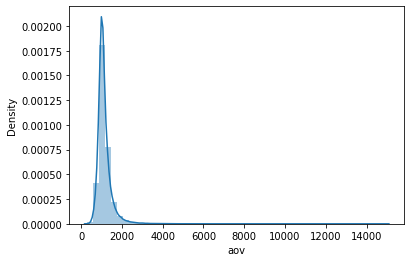

In [58]:
ax = sns.distplot(aov_df['aov'])

In [59]:
# estimate the average transaction value of each customer, based on frequency and monetary value
exp_avg_rev = ggf.conditional_expected_average_profit(
        df_rfmt["frequency"],
        df_rfmt["monetary_value"])

df_rfmt["exp_avg_rev"] = exp_avg_rev
df_rfmt["avg_rev"] = df_rfmt["monetary_value"]
df_rfmt["error_rev"] = df_rfmt["exp_avg_rev"] - df_rfmt["avg_rev"]


mape = mean_absolute_percentage_error(exp_avg_rev, df_rfmt["monetary_value"])
print("MAPE of predicted revenues:", f'{mape:.2f}')

pd.options.display.float_format = '{:,.3f}'.format
df_rfmt.head()

MAPE of predicted revenues: 0.28


,frequency,recency,T,monetary_value,predicted_purchases,predict_purch_1,predict_purch_30,predict_purch_180,predict_purch_365,prob_alive,exp_avg_rev,avg_rev,error_rev
customer,,,,,,,,,,,,,
00001f06-ae9a-4063-a22d-fd7754c89d74,2.000,99.000,246.000,834.000,0.005,0.005,0.133,0.714,1.286,0.397,"1,033.953",834.000,199.953
00002857-64cb-4112-afb9-aa8e6eb79eb4,6.000,205.000,265.000,332.167,0.016,0.016,0.460,2.369,4.116,0.664,662.791,332.167,330.624
0000cc39-a123-425f-b133-ae254f905176,5.000,349.000,596.000,481.200,0.003,0.003,0.085,0.476,0.889,0.293,778.876,481.200,297.676
0001ae29-bf87-411e-afed-3545f835ac52,25.000,387.000,418.000,"1,269.640",0.045,0.045,1.301,6.659,11.497,0.782,"1,248.940","1,269.640",-20.700
0001cd9d-eae6-41df-ae53-063592b30c67,0.000,0.000,434.000,0.000,0.003,0.003,0.080,0.458,0.883,1.000,"1,127.668",0.000,"1,127.668"


## Predicting Customer Lifetime Value

### BG/NBD model to predict the number of orders the Gamma-Gamma model to predict their values

In [ ]:
bgf.fit(returning_customers['frequency'], 
        returning_customers['recency'], 
        returning_customers['T'])

<lifetimes.BetaGeoFitter: fitted with 189211 subjects, a: 1.45, alpha: 51.00, b: 8.88, r: 1.73>

In [ ]:
preds = ggf.customer_lifetime_value(
    bgf,
    returning_customers['frequency'],
    returning_customers['recency'],
    returning_customers['T'],
    returning_customers['monetary_value'],
    time = 12, # 12 months into the future we wish to predict.
    discount_rate = 0.01
)

preds = preds.to_frame().reset_index()

In [ ]:
preds.sort_values(by='clv', ascending=False).head()

,customer,clv
83107,704229b8-f17b-4fc9-81d4-b96a55364da2,"223,246.385"
38819,34802e1c-c3e2-49cc-9148-701e19f3cfb5,"151,100.447"
33073,2cc1572d-4d63-4982-968f-872a960e149b,"150,408.723"
151327,ccd73a11-f612-4c12-b05d-8203aabe8147,"136,651.496"
68332,5c44276c-b075-4a50-95c9-419c89ea49ff,"134,218.389"


In [ ]:
preds.sort_values(by='clv', ascending=False).tail()

,customer,clv
82998,70191021-0565-46c1-a66a-d8c3c072f1a5,0.000
135226,b7185288-986c-4c64-9b79-32be6562928c,0.000
50313,443005b6-2ea3-444c-823a-d9454c6cef6f,0.000
109512,94316aba-a135-4cc3-b53f-3632aa79616b,0.000
119986,a255d357-1c4f-4a56-a14b-f1173087aca6,0.000
